# POSTTEST 6
### Nama : Fransiskus Andre
### Nim : 2009106065

# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import dataset

In [3]:
df = pd.read_csv('breast-cancer.csv')

# Data Preprocessing

## Transformasi data

In [4]:
df['diagnosis']=df['diagnosis'].replace(['M', 'B'],[1,0])#mentranformasi data 

## Standarisasi data

In [5]:
std_scaler = StandardScaler()
standarisasi = std_scaler.fit_transform(df[df.columns.difference(['id','diagnosis'])])
df[df.columns.difference(['id','diagnosis'])] = standarisasi
print("Nilai standar deviasi setelah scaling:", np.nanstd(standarisasi))


Nilai standar deviasi setelah scaling: 1.0


# Modeling

## Membuat model klastering

In [6]:
model = KMeans(n_clusters=2)
# Pilih atribut yang akan dilatih
variabel = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
# Lakukan fit terhadap model
model.fit(variabel)
labels = model.labels_

## Visualisasi data

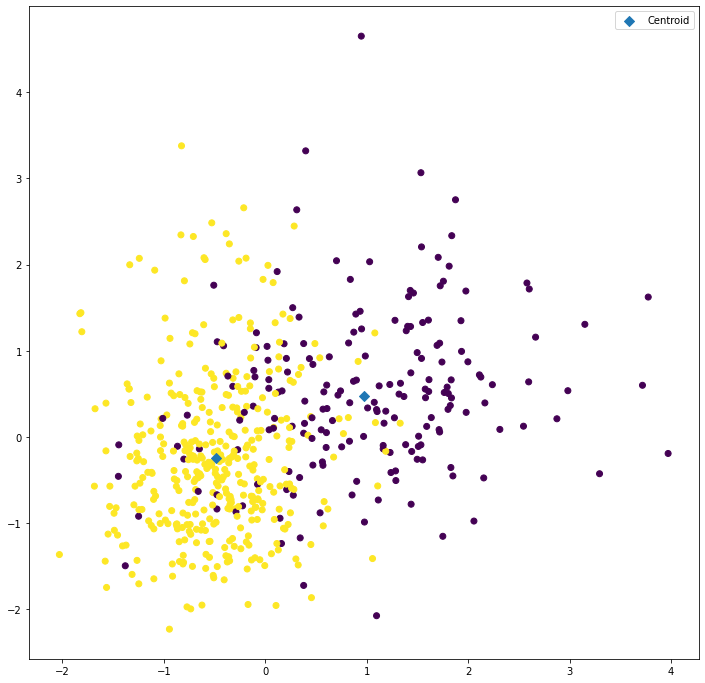

In [7]:
# mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = variabel.iloc[:,0]
ys = variabel.iloc[:,1]
# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# visualisasi cluster
plt.figure(figsize=(12,12))
plt.scatter(xs,ys,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.legend()
plt.show()

 # Mengkonversi hasil klastering

In [8]:
hasil = pd.concat([variabel.reset_index(drop = True),pd.Series(labels)],axis = 1)

In [9]:
hasil.to_csv("hasil_prediksi.csv",index = False)


In [10]:
df_hasil = pd.read_csv("hasil_prediksi.csv")

In [11]:
df_hasil.rename(columns={df_hasil.columns[-1]: 'prediksi'}, inplace=True)

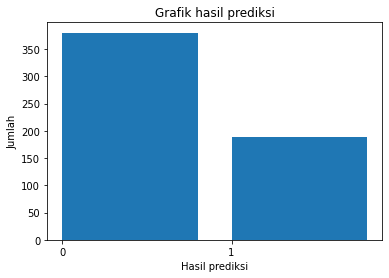

In [12]:
plt.bar(df_hasil['prediksi'].unique(), df_hasil['prediksi'].value_counts(), align = 'edge')
plt.xticks(df_hasil['prediksi'].unique())
plt.xlabel("Hasil prediksi") 
plt.ylabel("Jumlah") 
plt.title("Grafik hasil prediksi") 
plt.show() 